In [1]:
import numpy as np
import math
import statistics
from scipy.stats import norm
import matplotlib.pyplot as plt

In [10]:
# Stock data
S0 = 100
Sig = 0.4
r = 0.05
miu = 0.1

# Options strikes and maturities
k1 = 105
k2 = 95
T = 10

# Number of scenarios, confidence level, risk horizon
n = 100000
confidence = 0.95
h = 1


In [ ]:
# Option prices at time 0 (Black–Scholes)
d1c = (math.log(S0 / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
d1p = (math.log(S0 / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
c0 = S0 * norm.cdf(d1c) - k1 * math.exp(-r * T) * norm.cdf(d1c - Sig * T ** 0.5)
p0 = -S0 * norm.cdf(-d1p) + k2 * math.exp(-r * T) * norm.cdf(-d1p + Sig * T ** 0.5)
v0 = c0 - p0

print("Bear RR price at t=0:", v0)

Bear RR price at t=0: 39.91456225660142


In [28]:
from random import seed, gauss

# Seed random number generator
seed(1)

# Computing the prices at time h
T = T - h
Zt = np.zeros(n)
St = np.zeros(n)

In [ ]:
# Question 3
# Vectorization for efficiency
Zt = np.random.normal(0, 1, n)
St = S0 * np.exp((miu - 0.5 * Sig ** 2) * h) * np.exp(Zt * Sig * (h ** 0.5))

ct = np.zeros(n)
pt = np.zeros(n)

d1cnew = (np.log(St / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
d1pnew = (np.log(St / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
ct = St * norm.cdf(d1cnew) - k1 * np.exp(-r * T) * norm.cdf(d1cnew - Sig * T ** 0.5)
pt = -St * norm.cdf(-d1pnew) + k2 * np.exp(-r * T) * norm.cdf(-d1pnew + Sig * T ** 0.5)

In [ ]:
# # Question 3
# # for-loop
# # Generate random Gaussian values and stock scenarios at time h
# for j in range(n):
#     Zt[j] = gauss(0, 1)
#     St[j] = S0 * math.exp((miu - 0.5 * Sig ** 2) * h) * math.exp(Zt[j] * Sig * (h ** 0.5))

# ct = np.zeros(n)
# pt = np.zeros(n)

# # Generating call and put scenarios at time h
# for i in range(n):
#     d1cnew = (math.log(St[i] / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
#     d1pnew = (math.log(St[i] / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
#     ct[i] = St[i] * norm.cdf(d1cnew) - k1 * math.exp(-r * T) * norm.cdf(d1cnew - Sig * T ** 0.5)
#     pt[i] = -St[i] * norm.cdf(-d1pnew) + k2 * math.exp(-r * T) * norm.cdf(-d1pnew + Sig * T ** 0.5)


VaR: 59.02330921322353
ES: 66.5374943293345


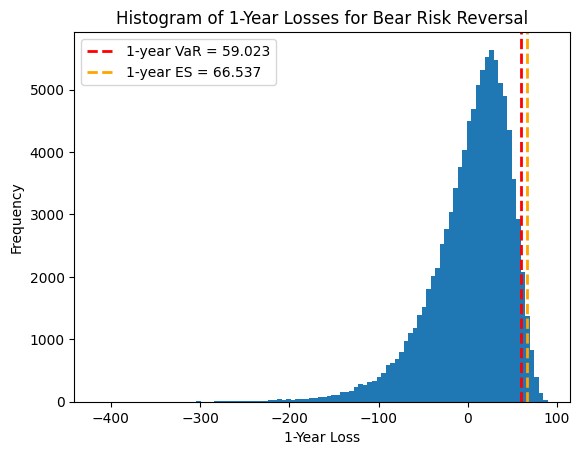

In [34]:
# Final portfolio value in all scenarios
vt = ct - pt

# Loss scenarios
vvar = v0 - vt
vvar = np.sort(vvar)

# Extracting VaR from the loss at the right confidence level
ivar = round(confidence * n)
var = vvar[ivar]

# Calculating ES
ESv = statistics.mean(vvar[range(math.floor(confidence * n), n)])

print("VaR:", var)
print("ES:", ESv)

# Plotting loss histogram
plt.figure()
plt.hist(vvar, bins=100)
plt.axvline(x=var, color='red', linestyle='--', linewidth=2, label=f'1-year VaR = {var:.3f}')
plt.axvline(x=ESv, color='orange', linestyle='--', linewidth=2, label=f'1-year ES = {ESv:.3f}')
plt.xlabel('1-Year Loss')
plt.ylabel('Frequency')
plt.title('Histogram of 1-Year Losses for Bear Risk Reversal')
plt.legend()
plt.show()

In [35]:
def question_five(Sig):
    # Stock data
    S0 = 100
    Sig = Sig
    r = 0.05
    miu = 0.1

    # Options strikes and maturities
    k1 = 105
    k2 = 95
    T = 10

    # Number of scenarios, confidence level, risk horizon
    n = 100000
    confidence = 0.95
    h = 1

    d1c = (math.log(S0 / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
    d1p = (math.log(S0 / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * T ** 0.5)
    c0 = S0 * norm.cdf(d1c) - k1 * math.exp(-r * T) * norm.cdf(d1c - Sig * T ** 0.5)
    p0 = -S0 * norm.cdf(-d1p) + k2 * math.exp(-r * T) * norm.cdf(-d1p + Sig * T ** 0.5)
    v0 = c0 - p0

    seed(1)

    # Computing the prices at time h
    T = T - h
    Zt = np.zeros(n)
    St = np.zeros(n)

    Zt = np.random.normal(0, 1, n)
    St = S0 * np.exp((miu - 0.5 * Sig ** 2) * h) * np.exp(Zt * Sig * (h ** 0.5))

    ct = np.zeros(n)
    pt = np.zeros(n)

    d1cnew = (np.log(St / k1) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
    d1pnew = (np.log(St / k2) + (r + 0.5 * Sig ** 2) * T) / (Sig * (T ** 0.5))
    ct = St * norm.cdf(d1cnew) - k1 * np.exp(-r * T) * norm.cdf(d1cnew - Sig * T ** 0.5)
    pt = -St * norm.cdf(-d1pnew) + k2 * np.exp(-r * T) * norm.cdf(-d1pnew + Sig * T ** 0.5)

    # Final portfolio value in all scenarios
    vt = ct - pt

    # Loss scenarios
    vvar = v0 - vt
    vvar = np.sort(vvar)

    # Extracting VaR from the loss at the right confidence level
    ivar = round(confidence * n)
    var = vvar[ivar]

    # Calculating ES
    ESv = statistics.mean(vvar[range(math.floor(confidence * n), n)])

    print(f"VaR (Sig={Sig}) :{var}")
    print(f"ES (Sig={Sig}) :{ESv}")

    # Plotting loss histogram
    plt.figure()
    plt.hist(vvar, bins=100)
    plt.axvline(x=var, color='red', linestyle='--', linewidth=2, label=f'1-year VaR = {var:.3f}')
    plt.axvline(x=ESv, color='orange', linestyle='--', linewidth=2, label=f'1-year ES = {ESv:.3f}')
    plt.xlabel('1-Year Loss')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of 1-Year Losses for Bear Risk Reversal (Sig={Sig})')
    plt.legend()
    plt.show()

VaR (Sig=0.6) :67.73544712201948
ES (Sig=0.6) :74.69240835137751


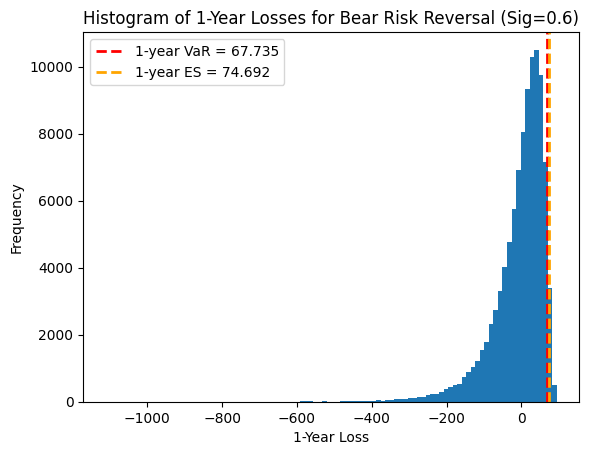

VaR (Sig=0.8) :81.0425133929088
ES (Sig=0.8) :86.45373993402534


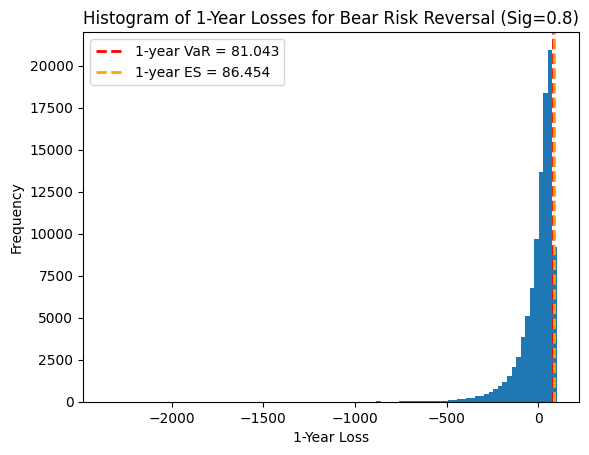

VaR (Sig=1.0) :89.66947065707214
ES (Sig=1.0) :93.57045653889178


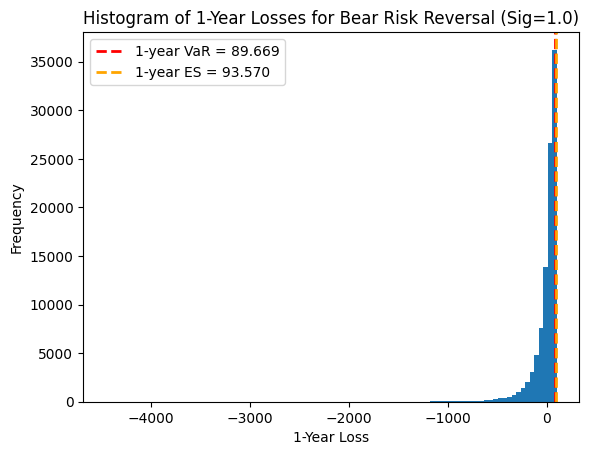

In [36]:
for Sig in [0.6, 0.8, 1.0]: 
    question_five(Sig)